In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Loading the Dataset
data = pd.read_csv('/content/diabetes.csv')

In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.shape

(768, 9)

In [47]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data['Outcome'].value_counts()
#0->Non-Diabetic
#1->Diabetic

,count
Outcome,
0,500
1,268


In [50]:
# Print the distribution of the Outcome variable.
data["Outcome"].value_counts()*100/len(data)

,count
Outcome,
0,65.104167
1,34.895833


In [51]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [52]:
# Count of null values
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


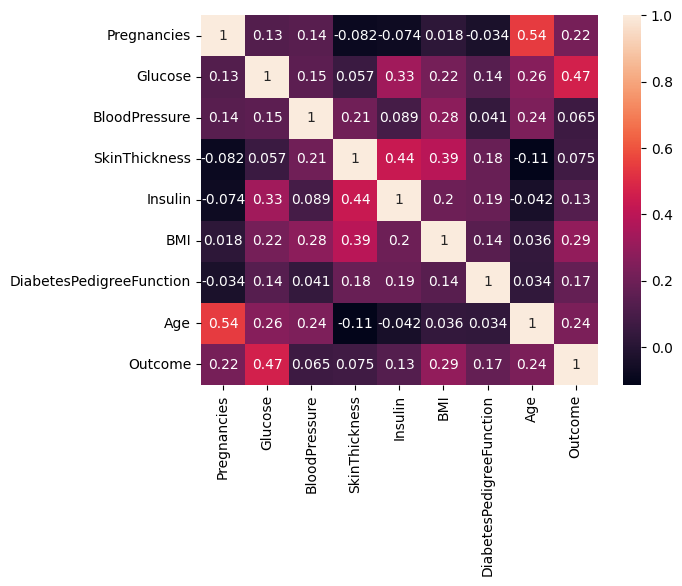

In [53]:
# Heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations**:

1.There are a total of 768 records and 9 features in the dataset.

2.Each feature can be either of integer or float dataype.

3.Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.

4.There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

**Data Preprocessing**


In [54]:
dataset_new = data

In [55]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
# Replacing zero values with NaN
dataset_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]] = dataset_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]].replace(0, np.nan)

In [57]:
dataset_new.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [58]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

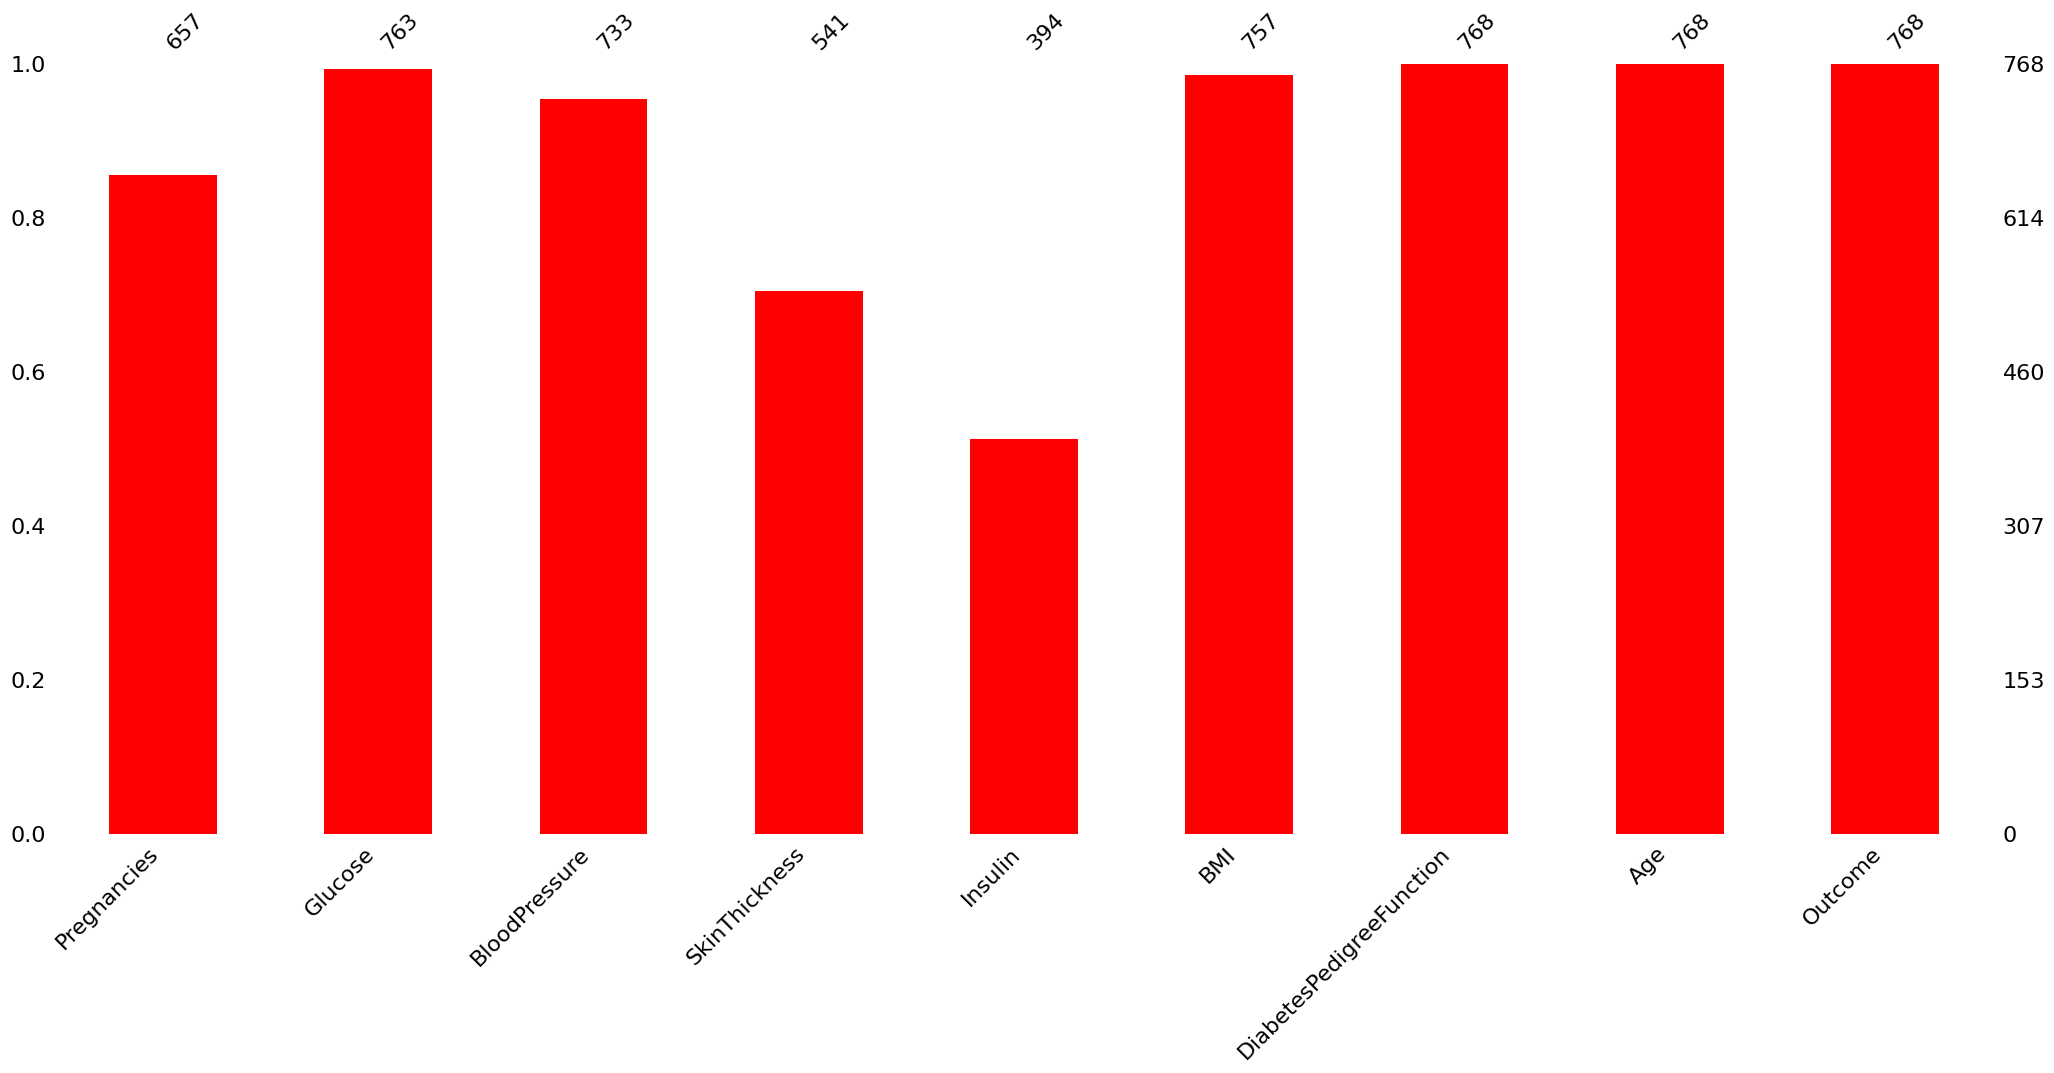

In [59]:
import missingno as msno
msno.bar(dataset_new , color='red')

In [60]:
# Group by the Outcome column and apply the fillna operation for each group separately
for col in ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    dataset_new[col] = dataset_new.groupby("Outcome")[col].transform(lambda x: x.fillna(x.median()))


In [61]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [62]:
dataset_new.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [63]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.377604,3.010736,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


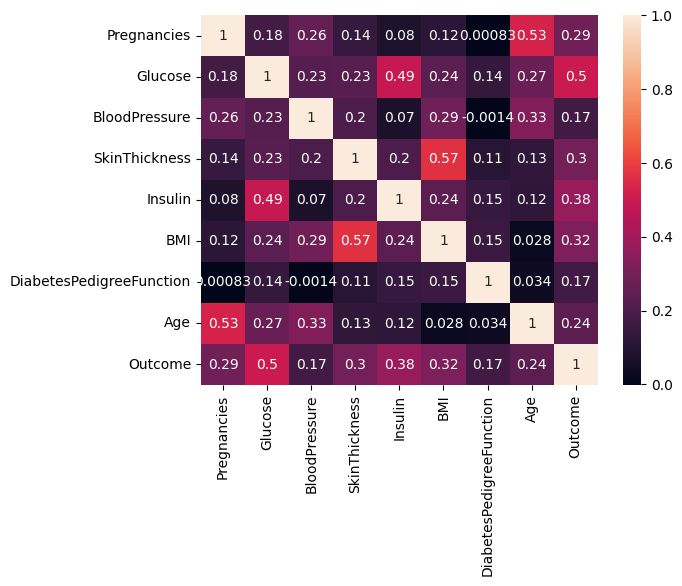

In [64]:
# Heatmap
sns.heatmap(dataset_new.corr(), annot = True)
plt.show()

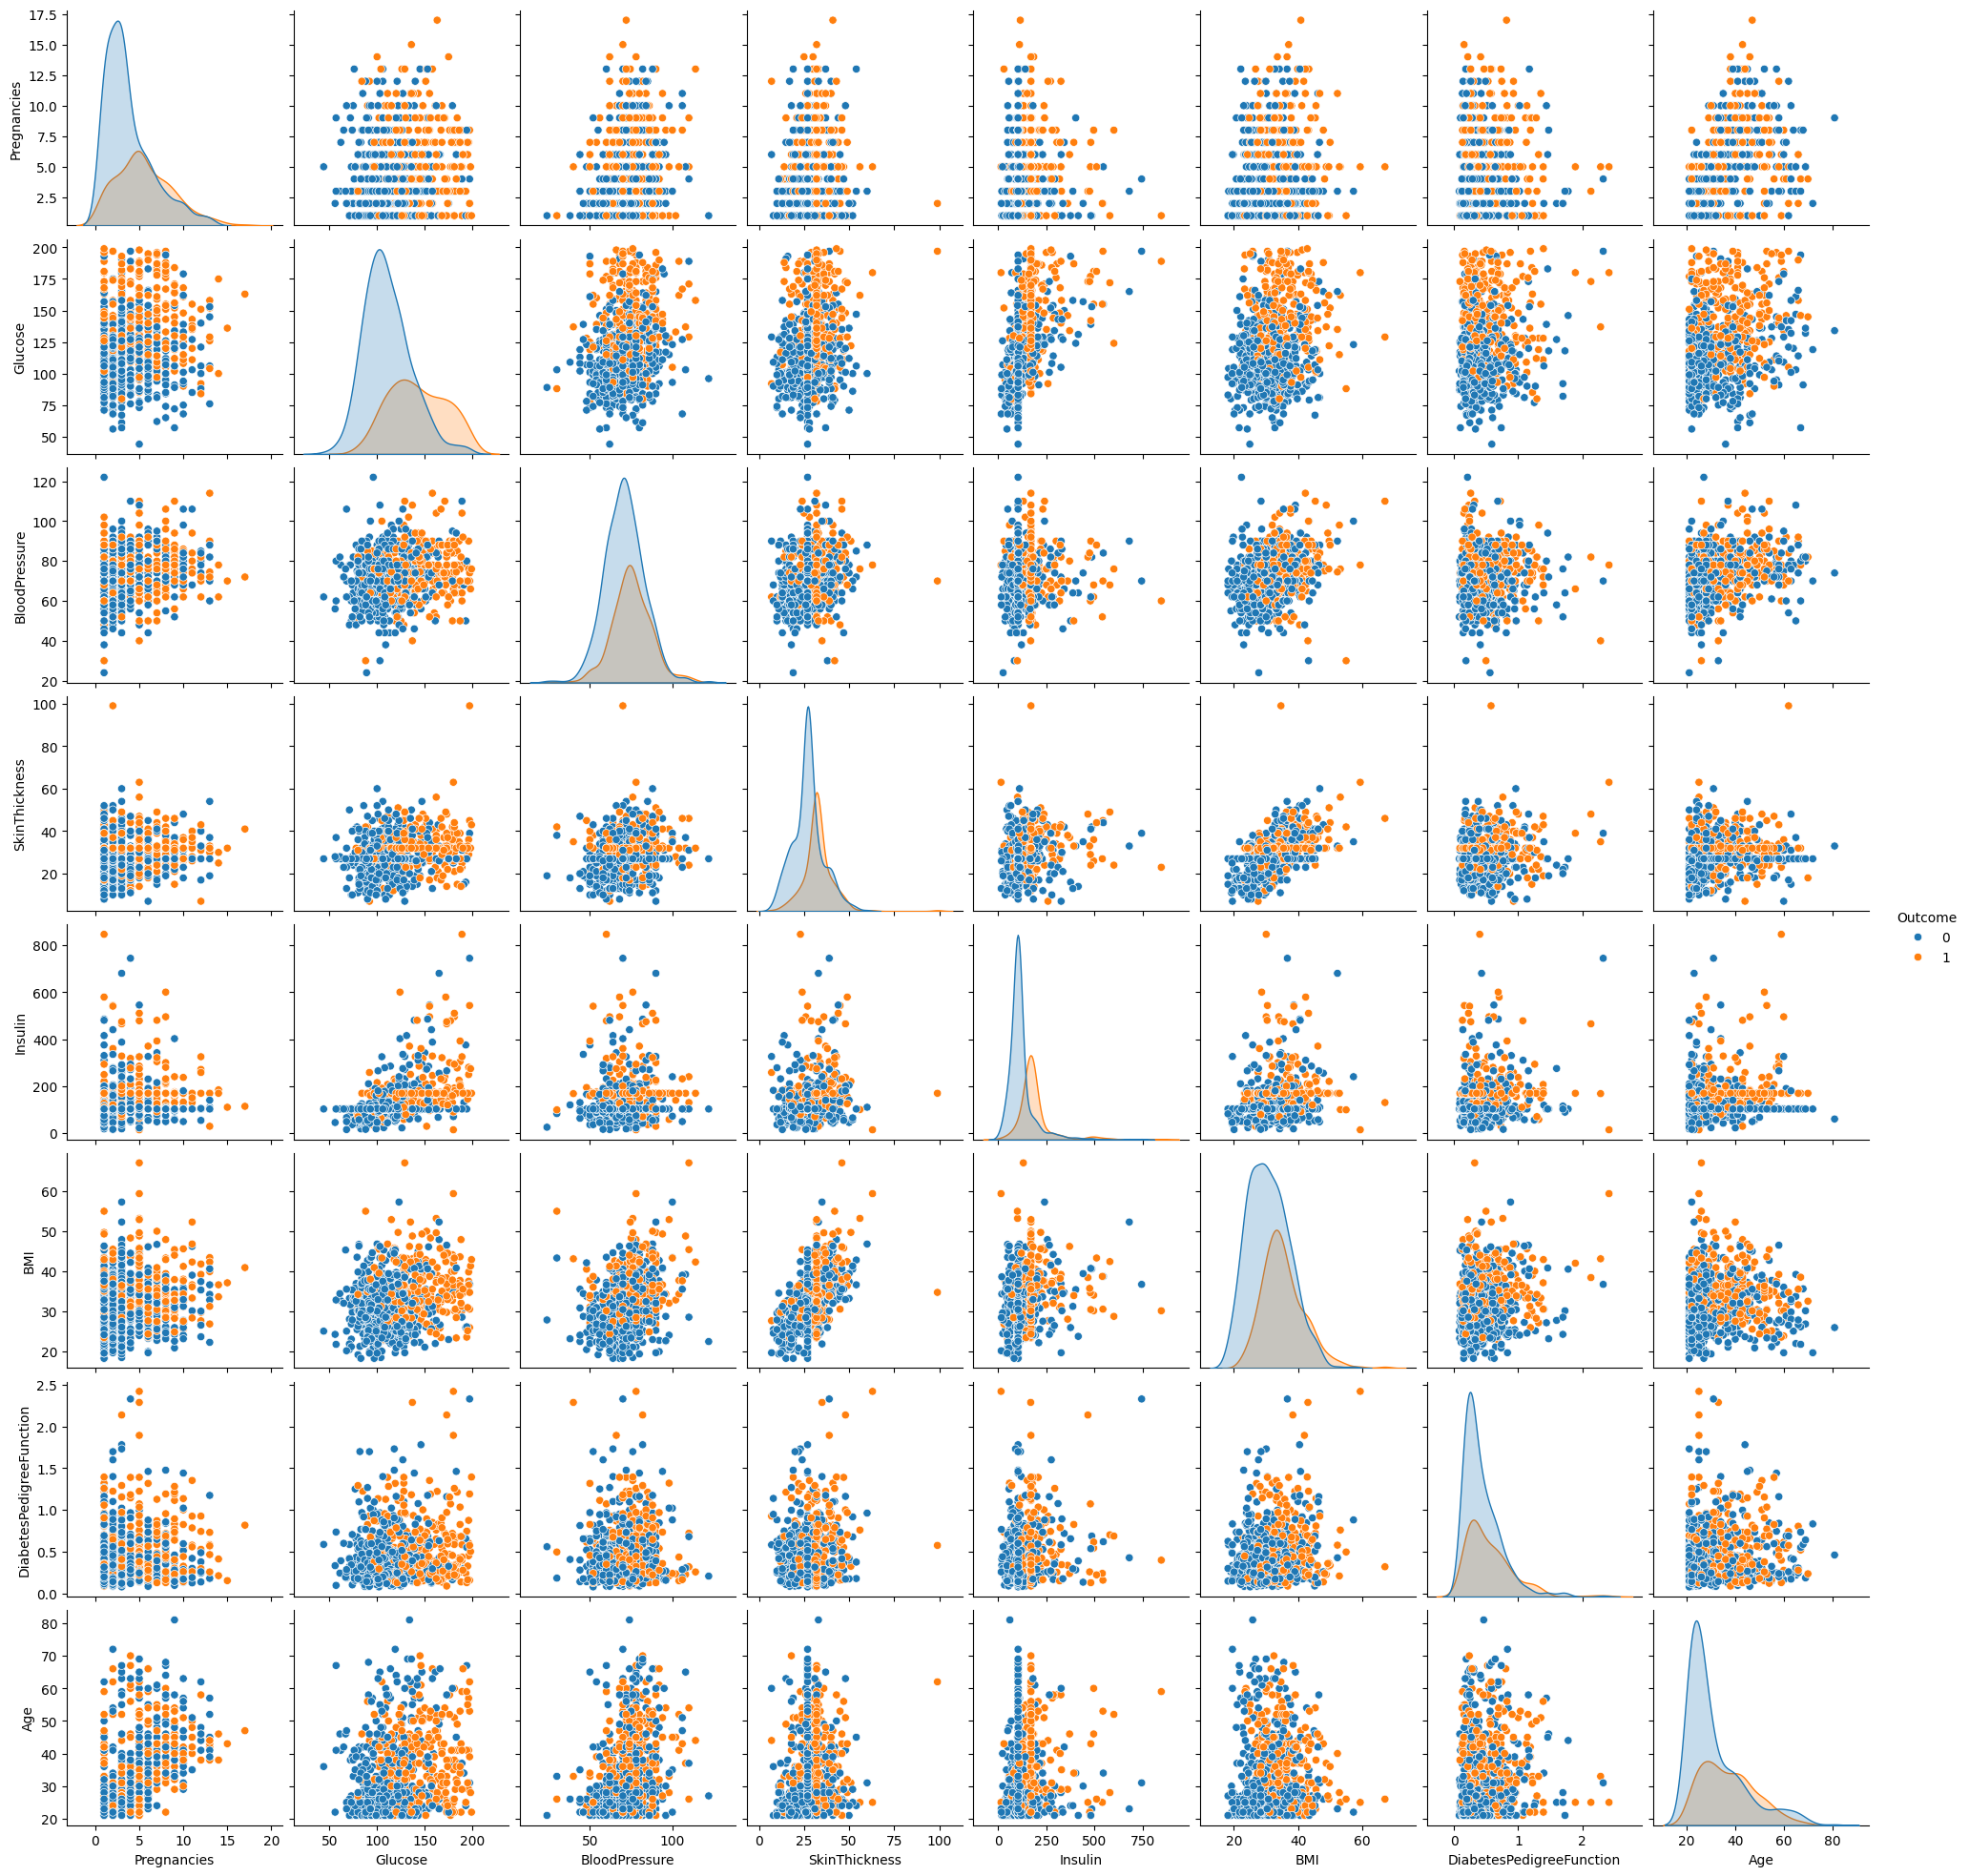

In [65]:
p=sns.pairplot(dataset_new, hue = 'Outcome')

In [66]:
#Outliner Detection
for features in dataset_new:
  q1=dataset_new[features].quantile(0.25)
  q3=dataset_new[features].quantile(0.75)
  IQR=q3-q1
  upper=q3+1.5*IQR
  lower=q1-1.5*IQR
  if ((dataset_new[features]>upper) | (dataset_new[features]<lower)).any():
    print(features,"Yes")
  else:
    print(features,"NO")

Pregnancies Yes
Glucose NO
BloodPressure Yes
SkinThickness Yes
Insulin Yes
BMI Yes
DiabetesPedigreeFunction Yes
Age Yes
Outcome NO


In [67]:
for feature in dataset_new.columns:
    q1 = dataset_new[feature].quantile(0.25)
    q3 = dataset_new[feature].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR

    outliers = ((dataset_new[feature] > upper) | (dataset_new[feature] < lower))
    outlier_count = outliers.sum()  # Sum of True values, which represent outliers

    print(f"{feature}: {outlier_count} outliers")


Pregnancies: 14 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 51 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


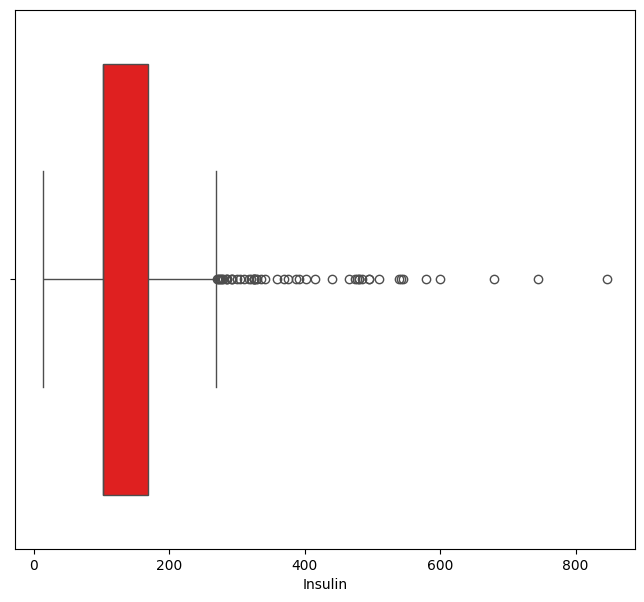

In [68]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = dataset_new["Insulin"], color="red");

In [69]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = dataset_new.Insulin.quantile(0.25)
Q3 = dataset_new.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
dataset_new.loc[dataset_new["Insulin"] > upper,"Insulin"] = upper

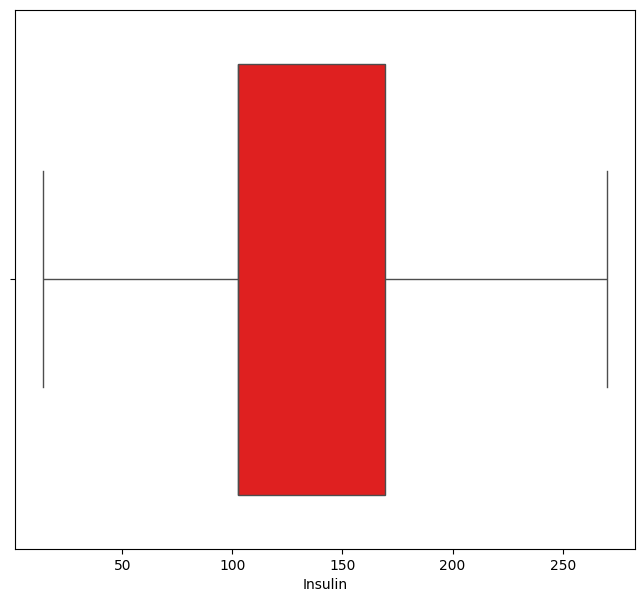

In [70]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = dataset_new["Insulin"], color="red");

In [71]:
# List of columns that need to be checked for outliers
columns_to_check = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for feature in columns_to_check:
    Q1 = dataset_new[feature].quantile(0.25)
    Q3 = dataset_new[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Suppress outliers by capping values beyond the upper threshold
    dataset_new.loc[dataset_new[feature] > upper, feature] = upper
    dataset_new.loc[dataset_new[feature] < lower, feature] = lower


/tmp/ipython-input-3539491205.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_new.loc[dataset_new[feature] > upper, feature] = upper


In [72]:
dataset_new.shape

(768, 9)

In [73]:
#Outliner Detection
for features in dataset_new:
  q1=dataset_new[features].quantile(0.25)
  q3=dataset_new[features].quantile(0.75)
  IQR=q3-q1
  upper=q3+1.5*IQR
  lower=q1-1.5*IQR
  if ((dataset_new[features]>upper) | (dataset_new[features]<lower)).any():
    print(features,"Yes")
  else:
    print(features,"NO")

Pregnancies NO
Glucose NO
BloodPressure NO
SkinThickness NO
Insulin NO
BMI NO
DiabetesPedigreeFunction NO
Age NO
Outcome NO


# **Feature Engineering**


Creating new variables is important for models.
But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [74]:
BMI_Categorie=pd.Series(["Underweight","Normalweight","Overweight","Obesity"],dtype='category')

In [75]:
BMI_Categorie

,0
0,Underweight
1,Normalweight
2,Overweight
3,Obesity


In [76]:
dataset_new['BMI_Categorie']=BMI_Categorie
dataset_new.loc[dataset_new["BMI"] < 18.5, "BMI_Categorie"] = BMI_Categorie[0]
dataset_new.loc[(dataset_new["BMI"] > 18.5) & (dataset_new["BMI"] <= 24.9), "BMI_Categorie"] = BMI_Categorie[1]
dataset_new.loc[(dataset_new["BMI"] > 24.9) & (dataset_new["BMI"] <= 29.9), "BMI_Categorie"] = BMI_Categorie[2]
dataset_new.loc[dataset_new["BMI"] > 30.0, "BMI_Categorie"] = BMI_Categorie[3]

In [77]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categorie
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normalweight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity


In [78]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [79]:
# The operation performed was added to the dataframe.
dataset_new = dataset_new.assign(NewInsulinScore=dataset_new.apply(set_insulin, axis=1))

dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categorie,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normalweight,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity,Abnormal


In [80]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
dataset_new["NewGlucose"] = NewGlucose
dataset_new.loc[dataset_new["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
dataset_new.loc[(dataset_new["Glucose"] > 70) & (dataset_new["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
dataset_new.loc[(dataset_new["Glucose"] > 99) & (dataset_new["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
dataset_new.loc[dataset_new["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [81]:
dataset_new.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categorie,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normalweight,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity,Abnormal,Secret


In [82]:
# Perform one-hot encoding and drop the first category to avoid multicollinearity
dataset_new = pd.get_dummies(dataset_new, columns=["BMI_Categorie", "NewInsulinScore", "NewGlucose"], drop_first=True)

# Convert boolean columns (True/False) to 1/0
dataset_new = dataset_new.astype(int)

# Check the result
dataset_new.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categorie_Obesity,BMI_Categorie_Overweight,BMI_Categorie_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,169,33,0,50,1,1,0,0,0,0,0,0,1
1,1,85,66,29,102,26,0,31,0,0,1,0,1,0,1,0,0
2,8,183,64,32,169,23,0,32,1,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28,0,21,0,0,1,0,1,0,1,0,0
4,5,137,40,35,168,43,1,33,1,1,0,0,0,0,0,0,1


In [84]:
dataset_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BMI_Categorie_Obesity', 'BMI_Categorie_Overweight',
       'BMI_Categorie_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [85]:
categorical_df=dataset_new[['BMI_Categorie_Obesity', 'BMI_Categorie_Overweight',
       'BMI_Categorie_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [86]:
y=data['Outcome']
x=dataset_new.drop(['Outcome','BMI_Categorie_Obesity', 'BMI_Categorie_Overweight',
       'BMI_Categorie_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],axis=1)

cols = x.columns
index = x.index

In [87]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,169,33,0,50
1,1,85,66,29,102,26,0,31
2,8,183,64,32,169,23,0,32
3,1,89,66,23,94,28,0,21
4,5,137,40,35,168,43,1,33


In [88]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x = transformer.transform(x)
x = pd.DataFrame(x, columns = cols, index = index)

In [89]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.765432,0.000,1.000000,1.000000,0.111111,0.0,1.235294
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647
2,1.25,1.629630,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471
3,-0.50,-0.691358,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588
4,0.50,0.493827,-2.000,1.000000,0.985075,1.222222,1.0,0.235294


In [90]:
X = pd.concat([x,categorical_df], axis = 1)

In [91]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Categorie_Obesity,BMI_Categorie_Overweight,BMI_Categorie_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.765432,0.000,1.000000,1.000000,0.111111,0.0,1.235294,1,0,0,0,0,0,0,1
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647,0,1,0,1,0,1,0,0
2,1.25,1.629630,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471,0,0,0,0,0,0,0,1
3,-0.50,-0.691358,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588,0,1,0,1,0,1,0,0
4,0.50,0.493827,-2.000,1.000000,0.985075,1.222222,1.0,0.235294,1,0,0,0,0,0,0,1


In [99]:
#splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)#

In [100]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
X_train

array([[ 0.20860439,  0.93634315,  1.47341282, ..., -0.55081581,
        -0.76119102,  1.25274818],
       [-1.16167763, -1.29489585, -0.4262815 , ...,  1.81548891,
        -0.76119102, -0.79824503],
       [-0.81910713, -0.01521466, -0.25358202, ..., -0.55081581,
         1.31373069, -0.79824503],
       ...,
       [-0.13396612, -0.93396013, -0.68533073, ...,  1.81548891,
        -0.76119102, -0.79824503],
       [ 2.26402741, -1.22927118,  0.09181695, ...,  1.81548891,
        -0.76119102, -0.79824503],
       [ 0.20860439,  0.44415808,  0.78261489, ..., -0.55081581,
        -0.76119102,  1.25274818]])

In [102]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (537, 16)
X_test shape: (231, 16)
Y_train shape: (537,)
Y_test shape: (231,)



**LogisticRegression(LR)**

In [103]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [104]:
# model predictions

y_pred = log_reg.predict(X_test)

In [105]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.8528864059590316
0.8701298701298701


In [106]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[144  13]
 [ 17  57]]


In [107]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       157
           1       0.81      0.77      0.79        74

    accuracy                           0.87       231
   macro avg       0.85      0.84      0.85       231
weighted avg       0.87      0.87      0.87       231



**KNN**

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
# model predictions

y_pred = knn.predict(X_test)

In [110]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8770949720670391
0.8571428571428571


In [111]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[143  14]
 [ 19  55]]


In [112]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       157
           1       0.80      0.74      0.77        74

    accuracy                           0.86       231
   macro avg       0.84      0.83      0.83       231
weighted avg       0.86      0.86      0.86       231



**DecisionTree**

In [113]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8268398268398268 

Confusion Matrix :- 
[[140  17]
 [ 23  51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       157
           1       0.75      0.69      0.72        74

    accuracy                           0.83       231
   macro avg       0.80      0.79      0.80       231
weighted avg       0.82      0.83      0.82       231



In [114]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 50, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
28000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklear

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [115]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}
0.8672727272727272


In [117]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.88268156424581
Test Accuracy of Decision Tree Classifier is 0.8571428571428571 

Confusion Matrix :- 
[[141  16]
 [ 17  57]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       157
           1       0.78      0.77      0.78        74

    accuracy                           0.86       231
   macro avg       0.84      0.83      0.84       231
weighted avg       0.86      0.86      0.86       231



**RF**

In [119]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [120]:
y_pred = rand_clf.predict(X_test)

In [121]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9813780260707635
0.9004329004329005


In [122]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[147  10]
 [ 13  61]]


In [123]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       157
           1       0.86      0.82      0.84        74

    accuracy                           0.90       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.90      0.90      0.90       231



**Model Comparison**

In [124]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,90.04
0,Logistic Regression,87.01
1,KNN,85.71
2,Decision Tree Classifier,85.71


In [126]:
import pickle
import os

model = rand_clf

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

pickle.dump(model, open("models/diabetes.pkl",'wb'))

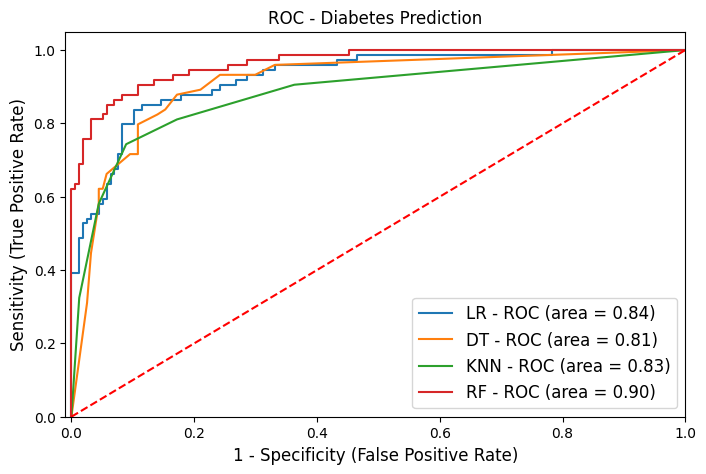

In [128]:
from sklearn import metrics
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},

{
    'label': 'KNN',
    'model': knn,
},

{
    'label': 'RF',
    'model': rand_clf,
},

]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Create the 'outputs' directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()